In [66]:
import os

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
from io import StringIO

import acquire as acq
import prepare as prep 

In [2]:
sql_query = "select * from passengers"
directory = os.getcwd()
url_for_query = acq.get_db_url("titanic_db")
filename = "titanic_passangers.csv"

In [3]:
titanic = acq.get_sql_data(sql_query, directory, url_for_query, filename)

In [4]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [5]:
titanic = titanic.drop(columns=['embarked','class', 'age','deck'])

In [6]:
dummy_df = pd.get_dummies(data=titanic[['sex','embark_town']], drop_first=True)


In [7]:
titanic = pd.concat([titanic, dummy_df], axis=1)
titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [8]:
titanic_train, titanic_validate, titanic_test = prep.split_function(titanic, 'survived')

In [9]:
#Baseline prediction is 0, did not survive
titanic_train.survived.value_counts()


0    329
1    205
Name: survived, dtype: int64

In [10]:
baseline = (titanic_train.survived == titanic_train.survived.value_counts().idxmax()).mean()
baseline

#baseline accuracy is 62%

0.6161048689138576

In [11]:
titanic_train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,male,0,0,7.8958,Cherbourg,1,1,0,0
380,380,1,1,female,0,0,227.5250,Cherbourg,1,0,0,0
492,492,0,1,male,0,0,30.5000,Southampton,1,1,0,1
55,55,1,1,male,0,0,35.5000,Southampton,1,1,0,1
243,243,0,3,male,0,0,7.1250,Southampton,1,1,0,1


In [12]:
col_cat = [] #this is for my categorical varibles
col_num = [] #this is for my numeric varibles

for col in titanic_train.columns[1:11]:
    print(col)
    if titanic_train[col].dtype == 'O':
        col_cat.append(col)
    else:
        if len(titanic_train[col].unique()) < 4: #making anything with less than 4 unique values a catergorical value
            col_cat.append(col)
        else:
            col_num.append(col)

survived
pclass
sex
sibsp
parch
fare
embark_town
alone
sex_male
embark_town_Queenstown


In [13]:
col_num

['sibsp', 'parch', 'fare']

In [14]:
col_cat

['survived',
 'pclass',
 'sex',
 'embark_town',
 'alone',
 'sex_male',
 'embark_town_Queenstown']

SURVIVED
0    329
1    205
Name: survived, dtype: int64
0    0.616105
1    0.383895
Name: survived, dtype: float64


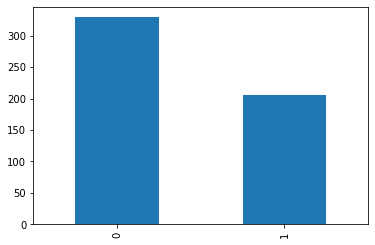


PCLASS
3    295
1    122
2    117
Name: pclass, dtype: int64
3    0.552434
1    0.228464
2    0.219101
Name: pclass, dtype: float64


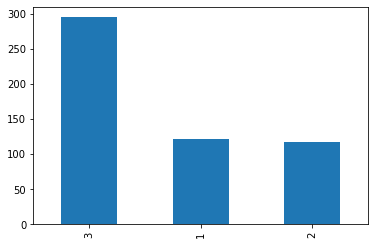


SEX
male      348
female    186
Name: sex, dtype: int64
male      0.651685
female    0.348315
Name: sex, dtype: float64


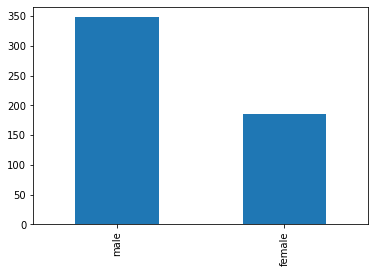


EMBARK_TOWN
Southampton    380
Cherbourg      107
Queenstown      46
Name: embark_town, dtype: int64
Southampton    0.712946
Cherbourg      0.200750
Queenstown     0.086304
Name: embark_town, dtype: float64


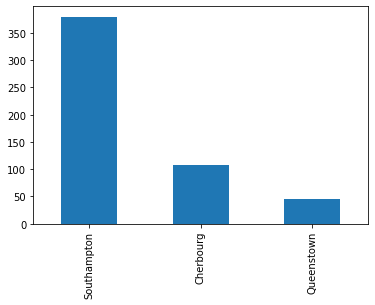


ALONE
1    335
0    199
Name: alone, dtype: int64
1    0.627341
0    0.372659
Name: alone, dtype: float64


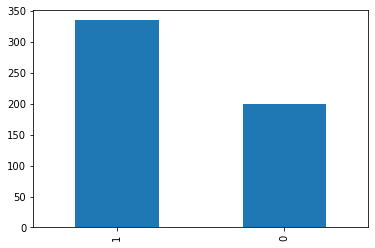


SEX_MALE
1    348
0    186
Name: sex_male, dtype: int64
1    0.651685
0    0.348315
Name: sex_male, dtype: float64


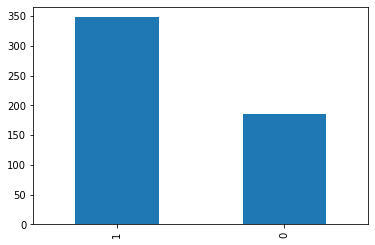


EMBARK_TOWN_QUEENSTOWN
0    488
1     46
Name: embark_town_Queenstown, dtype: int64
0    0.913858
1    0.086142
Name: embark_town_Queenstown, dtype: float64


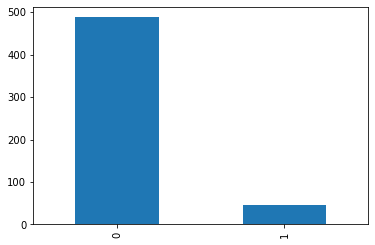

In [15]:
for col in col_cat:
    print(col.upper())
    print(titanic_train[col].value_counts())
    print(titanic_train[col].value_counts(normalize=True))
    titanic_train[col].value_counts().plot.bar()
    plt.show()
    print()

SIBSP
0    378
1    106
2     22
3     10
4     10
8      5
5      3
Name: sibsp, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


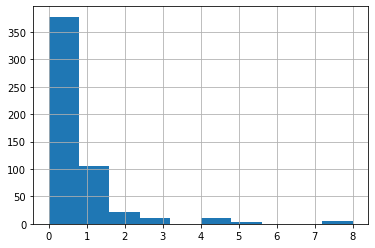

PARCH
0    414
1     67
2     45
3      4
5      3
4      1
Name: parch, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


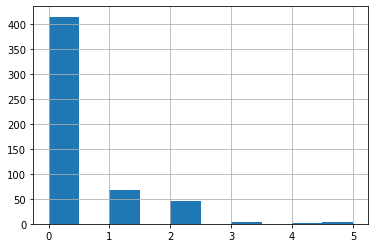

FARE
13.0000     27
7.8958      26
8.0500      25
7.7500      21
26.0000     17
            ..
7.3125       1
108.9000     1
80.0000      1
6.8583       1
8.3000       1
Name: fare, Length: 197, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


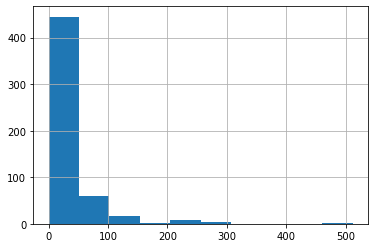

In [25]:
for col in col_num:
    print(col.upper())
    print(titanic_train[col].value_counts())
    print(titanic_train[col].hist())
    plt.show()


SURVIVED
0    329
1    205
Name: survived, dtype: int64
0    0.616105
1    0.383895
Name: survived, dtype: float64


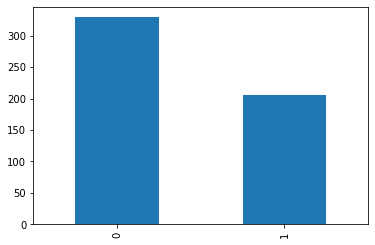



HYPOTHESIZE
H_0: survived does not survival
H_a: survived affects survival

VISUALIZE


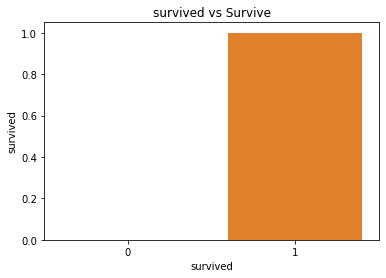


ANALYZE and SUMMARIZE
Observed
[[329   0]
 [  0 205]]

Expected
[[202 126]
 [126  78]]

----
chi^2 = 529.7804
p-value = 0.0000
----
We reject the null hypothesis.



PCLASS
3    295
1    122
2    117
Name: pclass, dtype: int64
3    0.552434
1    0.228464
2    0.219101
Name: pclass, dtype: float64


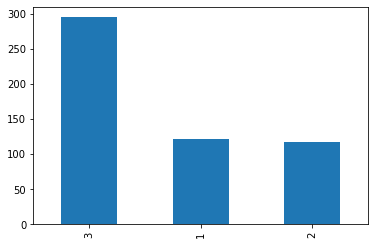



HYPOTHESIZE
H_0: pclass does not survival
H_a: pclass affects survival

VISUALIZE


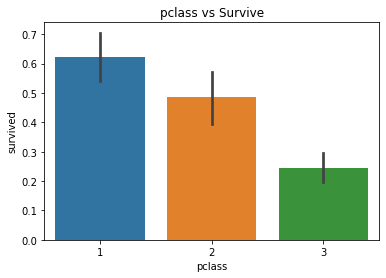


ANALYZE and SUMMARIZE
Observed
[[ 46  76]
 [ 60  57]
 [223  72]]

Expected
[[ 75  46]
 [ 72  44]
 [181 113]]

----
chi^2 = 59.1404
p-value = 0.0000
----
We reject the null hypothesis.



SEX
male      348
female    186
Name: sex, dtype: int64
male      0.651685
female    0.348315
Name: sex, dtype: float64


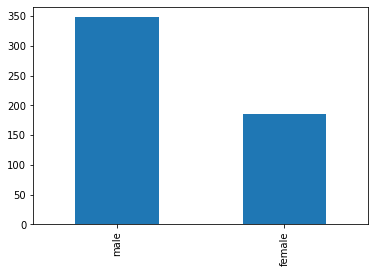



HYPOTHESIZE
H_0: sex does not survival
H_a: sex affects survival

VISUALIZE


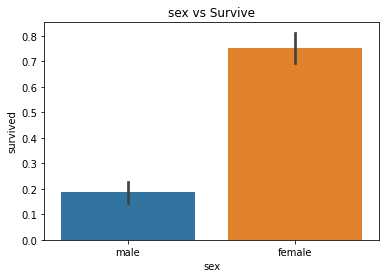


ANALYZE and SUMMARIZE
Observed
[[ 46 140]
 [283  65]]

Expected
[[114  71]
 [214 133]]

----
chi^2 = 161.7405
p-value = 0.0000
----
We reject the null hypothesis.



EMBARK_TOWN
Southampton    380
Cherbourg      107
Queenstown      46
Name: embark_town, dtype: int64
Southampton    0.712946
Cherbourg      0.200750
Queenstown     0.086304
Name: embark_town, dtype: float64


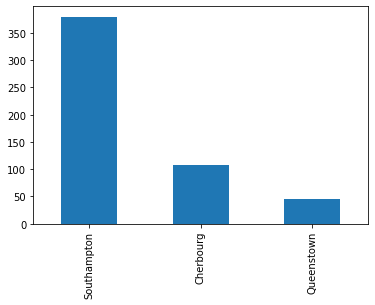



HYPOTHESIZE
H_0: embark town does not survival
H_a: embark town affects survival

VISUALIZE


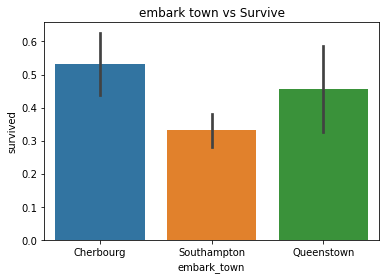


ANALYZE and SUMMARIZE
Observed
[[ 50  57]
 [ 25  21]
 [254 126]]

Expected
[[ 66  40]
 [ 28  17]
 [234 145]]

----
chi^2 = 15.4565
p-value = 0.0004
----
We reject the null hypothesis.



ALONE
1    335
0    199
Name: alone, dtype: int64
1    0.627341
0    0.372659
Name: alone, dtype: float64


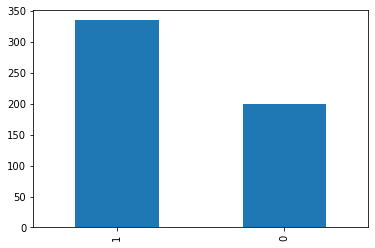



HYPOTHESIZE
H_0: alone does not survival
H_a: alone affects survival

VISUALIZE


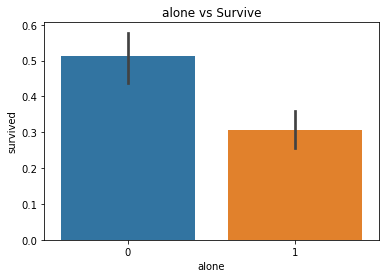


ANALYZE and SUMMARIZE
Observed
[[ 97 102]
 [232 103]]

Expected
[[122  76]
 [206 128]]

----
chi^2 = 21.3448
p-value = 0.0000
----
We reject the null hypothesis.



SEX_MALE
1    348
0    186
Name: sex_male, dtype: int64
1    0.651685
0    0.348315
Name: sex_male, dtype: float64


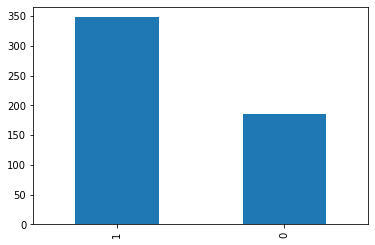



HYPOTHESIZE
H_0: sex male does not survival
H_a: sex male affects survival

VISUALIZE


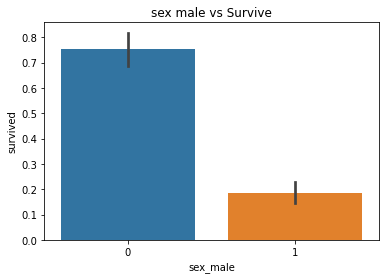


ANALYZE and SUMMARIZE
Observed
[[ 46 140]
 [283  65]]

Expected
[[114  71]
 [214 133]]

----
chi^2 = 161.7405
p-value = 0.0000
----
We reject the null hypothesis.



EMBARK_TOWN_QUEENSTOWN
0    488
1     46
Name: embark_town_Queenstown, dtype: int64
0    0.913858
1    0.086142
Name: embark_town_Queenstown, dtype: float64


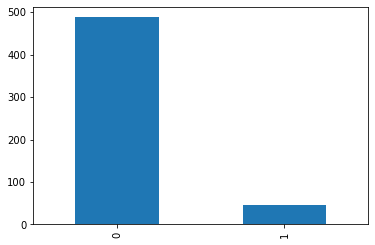



HYPOTHESIZE
H_0: embark town queenstown does not survival
H_a: embark town queenstown affects survival

VISUALIZE


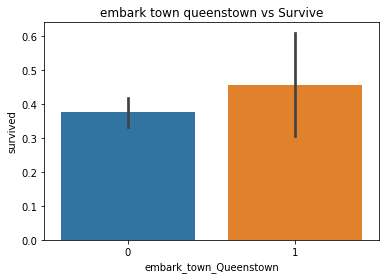


ANALYZE and SUMMARIZE
Observed
[[304 184]
 [ 25  21]]

Expected
[[300 187]
 [ 28  17]]

----
chi^2 = 0.8117
p-value = 0.3676
----
We fail to reject the null hypothesis.




In [16]:

for col in col_cat:
    print()
    print(col.upper())
    print(titanic_train[col].value_counts())
    print(titanic_train[col].value_counts(normalize=True))
    titanic_train[col].value_counts().plot.bar()
    plt.show()
    print()
    print()
    print(f'HYPOTHESIZE')
    print(f"H_0: {col.lower().replace('_',' ')} does not survival")
    print(f"H_a: {col.lower().replace('_',' ')} affects survival")
    print()
    print(f'VISUALIZE')
    sns.barplot(x=titanic_train[col], y=titanic_train['survived'])
    plt.title(f"{col.lower().replace('_',' ')} vs Survive")
    plt.show()
    print()
    print('ANALYZE and SUMMARIZE')
    observed = pd.crosstab(titanic_train[col], titanic_train.survived)
    prep.chi2Test(observed)
    print()
    print()

In [19]:
titanic_train.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,0,0,7.8958,1,1,0,0
380,380,1,1,0,0,227.5250,1,0,0,0
492,492,0,1,0,0,30.5000,1,1,0,1
55,55,1,1,0,0,35.5000,1,1,0,1
243,243,0,3,0,0,7.1250,1,1,0,1


In [18]:
titanic_train = titanic_train.drop(columns=["sex" , "embark_town"])


In [24]:
titanic_train.columns[2:9]

Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'embark_town_Queenstown'],
      dtype='object')

In [47]:
x_train = titanic_train[['pclass','fare',"alone", "sex_male"]]

In [48]:
x_train

,pclass,fare,alone,sex_male
455,3,7.8958,1,1
380,1,227.5250,1,0
492,1,30.5000,1,1
55,1,35.5000,1,1
243,3,7.1250,1,1
...,...,...,...,...
695,2,13.5000,1,1
128,3,22.3583,0,0
636,3,7.9250,1,1
222,3,8.0500,1,1


In [49]:
target = "survived"

In [50]:
y_train = titanic_train[target]

In [51]:
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [60]:
#Setting up the validation and testing sets
x_validate = titanic_validate[['pclass','fare',"alone", "sex_male"]]
x_test = titanic_test[['pclass','fare',"alone", "sex_male"]]
y_validate = titanic_validate[target]
y_test = titanic_test[target]

In [56]:
module1 = DecisionTreeClassifier()
module1

DecisionTreeClassifier()

In [57]:
module1.fit(x_train, y_train)

DecisionTreeClassifier()

In [58]:
module1.score(x_train, y_train)

0.9325842696629213

In [61]:
module1.score(x_validate, y_validate)

0.7808988764044944

TypeError: can only concatenate str (not "numpy.int64") to str

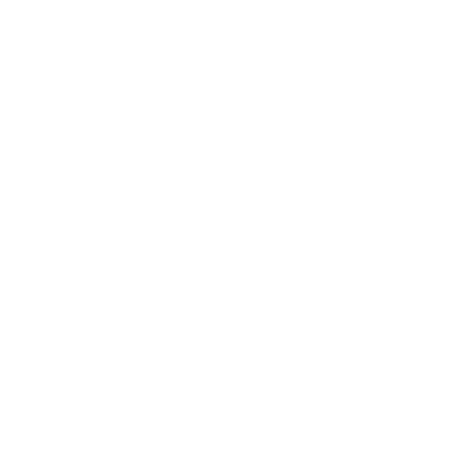

In [63]:
plt.figure(figsize=(8,8))
plot_tree(module1, #our fitted object
         feature_names=x_train.columns, #puts in our features for the questions
          class_names=module1.classes_, #enters the selected class
          filled=True #colors our leaves and branches based on the class
         )
plt.show()

In [ ]:
module2 = DecisionTreeClassifier(max_depth=3)

In [64]:
# random forest


In [80]:
titanic_rf = RandomForestClassifier(random_state=123, min_samples_leaf=1, max_depth=10)
titanic_rf

RandomForestClassifier(max_depth=10, random_state=123)

In [84]:
titanic_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [85]:
titanic_rf.score(x_train, y_train)

0.9325842696629213

In [86]:
#saving the y_pred
y_pred =titanic_rf.predict(x_train)

In [87]:
conf = confusion_matrix(y_train, y_pred)


In [94]:
conf

array([[322,   7],
       [ 29, 176]])

In [95]:
labels = sorted(y_train.unique())
labels

[0, 1]

In [113]:
titanic_conf = pd.DataFrame(conf, index=[label for label in labels], columns=[label  for label in labels])

In [114]:
titanic_conf.rename(columns={0: 'Predicted Death' , 1:"Predicted Life"}, inplace=True)

In [116]:
titanic_conf.rename(index={0: "Actual Death" , 1: "Actual Life"}, inplace=True)

In [117]:
titanic_conf

,Predicted Death,Predicted Life
Actual Death,322,7
Actual Life,29,176


In [ ]:
#predicting for death: TP = 322 , FP = 29 , TN = 176 , FN = 7

In [98]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       329
           1       0.96      0.86      0.91       205

    accuracy                           0.93       534
   macro avg       0.94      0.92      0.93       534
weighted avg       0.93      0.93      0.93       534



In [118]:
#Validation score
titanic_rf.score(x_validate, y_validate)

0.7921348314606742